In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

data = pd.read_csv('C:/Users/KOTA SRI SURYA TEJA/Desktop/Capstone/Output.csv')



X = data.iloc[:, 1:-1].values  # skipping the segment and label
y = data.iloc[:, -1].values   # considering only labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train = np.array(X_train)
# X_test = np.array(X_test)

# ma = X_train.max()
# mi = X_train.min()

# X_train = (X_train - mi)/(ma-mi)
# X_test = (X_test - mi)/(ma-mi)

In [148]:


model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 64 units
    Dense(64, activation='relu'),  # Another hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary(),X_train.shape[1]

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 32)                864       
_________________________________________________________________
dense_79 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 65        
Total params: 3,041
Trainable params: 3,041
Non-trainable params: 0
_________________________________________________________________


(None, 26)

In [149]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1)


Epoch 1/30
3/3 [==============================] - 0s 29ms/step - loss: 0.7302 - accuracy: 0.5000 - val_loss: 0.6769 - val_accuracy: 0.4000
Epoch 2/30
3/3 [==============================] - 0s 7ms/step - loss: 0.6840 - accuracy: 0.5000 - val_loss: 0.6123 - val_accuracy: 0.4000
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6530 - accuracy: 0.5455 - val_loss: 0.5569 - val_accuracy: 0.6000
Epoch 4/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6363 - accuracy: 0.5455 - val_loss: 0.5132 - val_accuracy: 0.6000
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6146 - accuracy: 0.5682 - val_loss: 0.4853 - val_accuracy: 0.6000
Epoch 6/30
3/3 [==============================] - 0s 9ms/step - loss: 0.6010 - accuracy: 0.5682 - val_loss: 0.4621 - val_accuracy: 0.6000
Epoch 7/30
3/3 [==============================] - 0s 6ms/step - loss: 0.5873 - accuracy: 0.5909 - val_loss: 0.4472 - val_accuracy: 0.6000
Epoch 8/30
3/3 [=================

In [150]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


1/1 [==============================] - 0s 908us/step - loss: 0.3858 - accuracy: 0.8462
Test Accuracy: 0.8461538553237915


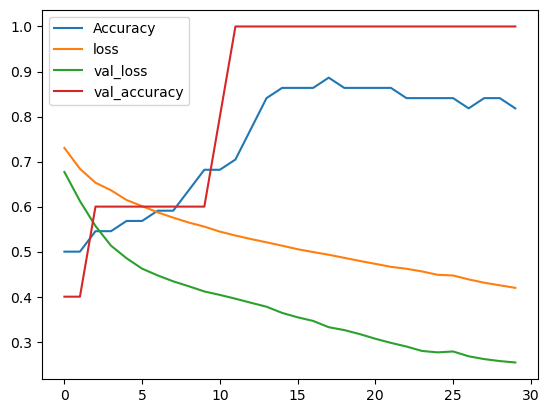

In [151]:
import matplotlib.pyplot as plt 

plt.plot(range(0,len(history.history['accuracy'])),history.history['accuracy'],label='Accuracy')
plt.plot(range(0,len(history.history['loss'])),history.history['loss'],label='loss')
plt.plot(range(0,len(history.history['val_loss'])),history.history['val_loss'],label='val_loss')
plt.plot(range(0,len(history.history['val_accuracy'])),history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

### Save the Model

In [152]:
model.save('C:/Users/KOTA SRI SURYA TEJA/Desktop/Capstone/final_model.h5')

 ### Save the StandardScaler normalization values

In [153]:
import joblib
joblib.dump(scaler, 'C:/Users/KOTA SRI SURYA TEJA/Desktop/Capstone/scaler.pkl')

['C:/Users/KOTA SRI SURYA TEJA/Desktop/Capstone/scaler.pkl']

In [154]:
scaler = joblib.load('C:/Users/KOTA SRI SURYA TEJA/Desktop/Capstone/scaler.pkl')
